In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt
import seaborn as sns
import collections

In [2]:
edges = pd.read_csv('C://Users//User//Desktop//musae_ENGB_edges.csv')
edges.columns = ['source', 'target']
nodes = pd.read_csv('C://Users//User//Desktop//musae_ENGB_target.csv')

In [3]:
print('Nodes dataset dimension:', nodes.shape, '\nEdges dataset dimension:', edges.shape)

Nodes dataset dimension: (7126, 6) 
Edges dataset dimension: (35324, 2)


In [4]:
nodes.head()

,id,days,mature,views,partner,new_id
0,73045350,1459,False,9528,False,2299
1,61573865,1629,True,3615,False,153
2,171688860,411,True,46546,False,397
3,117338954,953,True,5863,False,5623
4,135804217,741,True,5594,False,5875


In [5]:
edges.head()

,source,target
0,6194,255
1,6194,980
2,6194,2992
3,6194,2507
4,6194,986


In [6]:
edges.describe()

,source,target
count,35324.000000,35324.000000
mean,2532.502152,4479.915836
std,1806.583568,1756.014934
min,0.000000,1.000000
25%,1007.750000,3160.000000
50%,2212.000000,4767.000000
75%,3819.000000,5934.000000
max,7125.000000,7125.000000


In [7]:
nodes.drop("id", axis=1, inplace=True)

In [8]:
nodes.rename(columns = {'new_id':'id'}, inplace = True)

In [9]:
nodes.head()

,days,mature,views,partner,id
0,1459,False,9528,False,2299
1,1629,True,3615,False,153
2,411,True,46546,False,397
3,953,True,5863,False,5623
4,741,True,5594,False,5875


In [10]:
#correcting datatypes

nodes.mature = nodes.mature.astype(int) 
nodes.partner = nodes.partner.astype(int)

In [13]:

nodes.set_index('id')

,days,mature,views,partner
id,,,,
2299,1459,0,9528,0
153,1629,1,3615,0
397,411,1,46546,0
5623,953,1,5863,0
5875,741,1,5594,0
...,...,...,...,...
3794,2624,0,3174,0
6534,2035,1,3158,0
2041,1418,1,3839,0


In [14]:
nodes_dict = nodes.to_dict('index')

In [15]:
# creating the graph

G = nx.from_pandas_edgelist(edges, source='source', target='target')
nx.set_node_attributes(G, nodes_dict)

In [16]:
print("Info:\n", nx.info(G), "\n")
print("Is directed: ", nx.is_directed(G))

Info:
 Name: 
Type: Graph
Number of nodes: 7126
Number of edges: 35324
Average degree:   9.9141 

Is directed:  False


In [17]:
import matplotlib.pyplot as plt

distribution plot

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


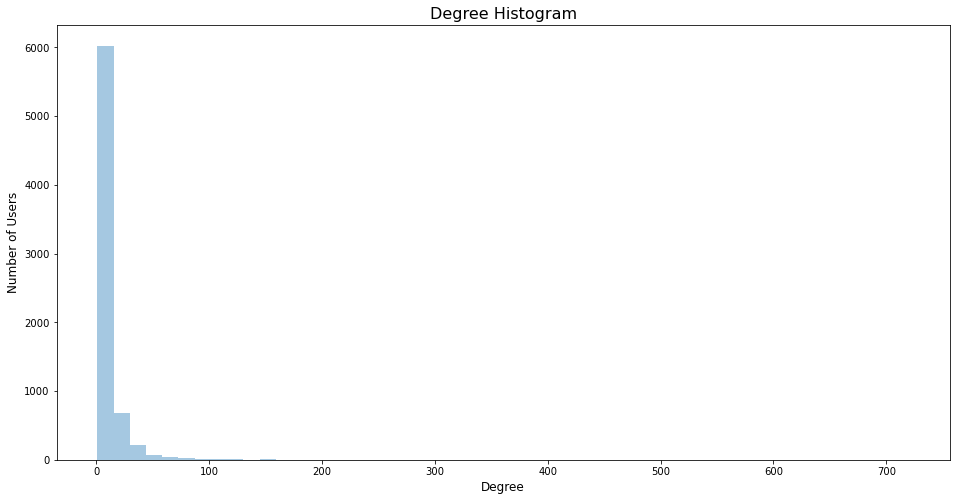

In [18]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)

deg, cnt = zip(*degreeCount.items())

plt.figure(figsize=(16, 8))
plt.title("Degree Histogram", fontsize=16)
plt.ylabel("Number of Users", fontsize=12)
plt.xlabel("Degree", fontsize=12)

sns.distplot(degree_sequence, kde=False)
plt.show()


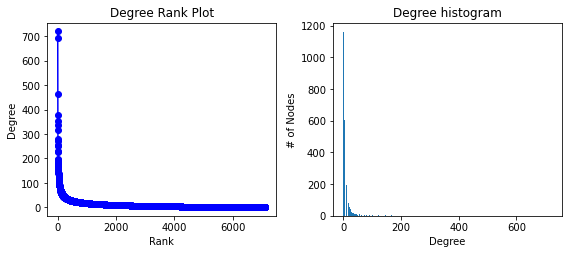

In [20]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

#ax0 = fig.add_subplot(axgrid[0:3, :])
#Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
#pos = nx.spring_layout(Gcc, seed=10396953)
#nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
#nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
#ax0.set_title("components of G")
#ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.setp(ax1.spines.values(), color='k') # Change the frame border to black ('k')
plt.setp(ax2.spines.values(), color='k') # Change the frame border to black ('k')
plt.show()

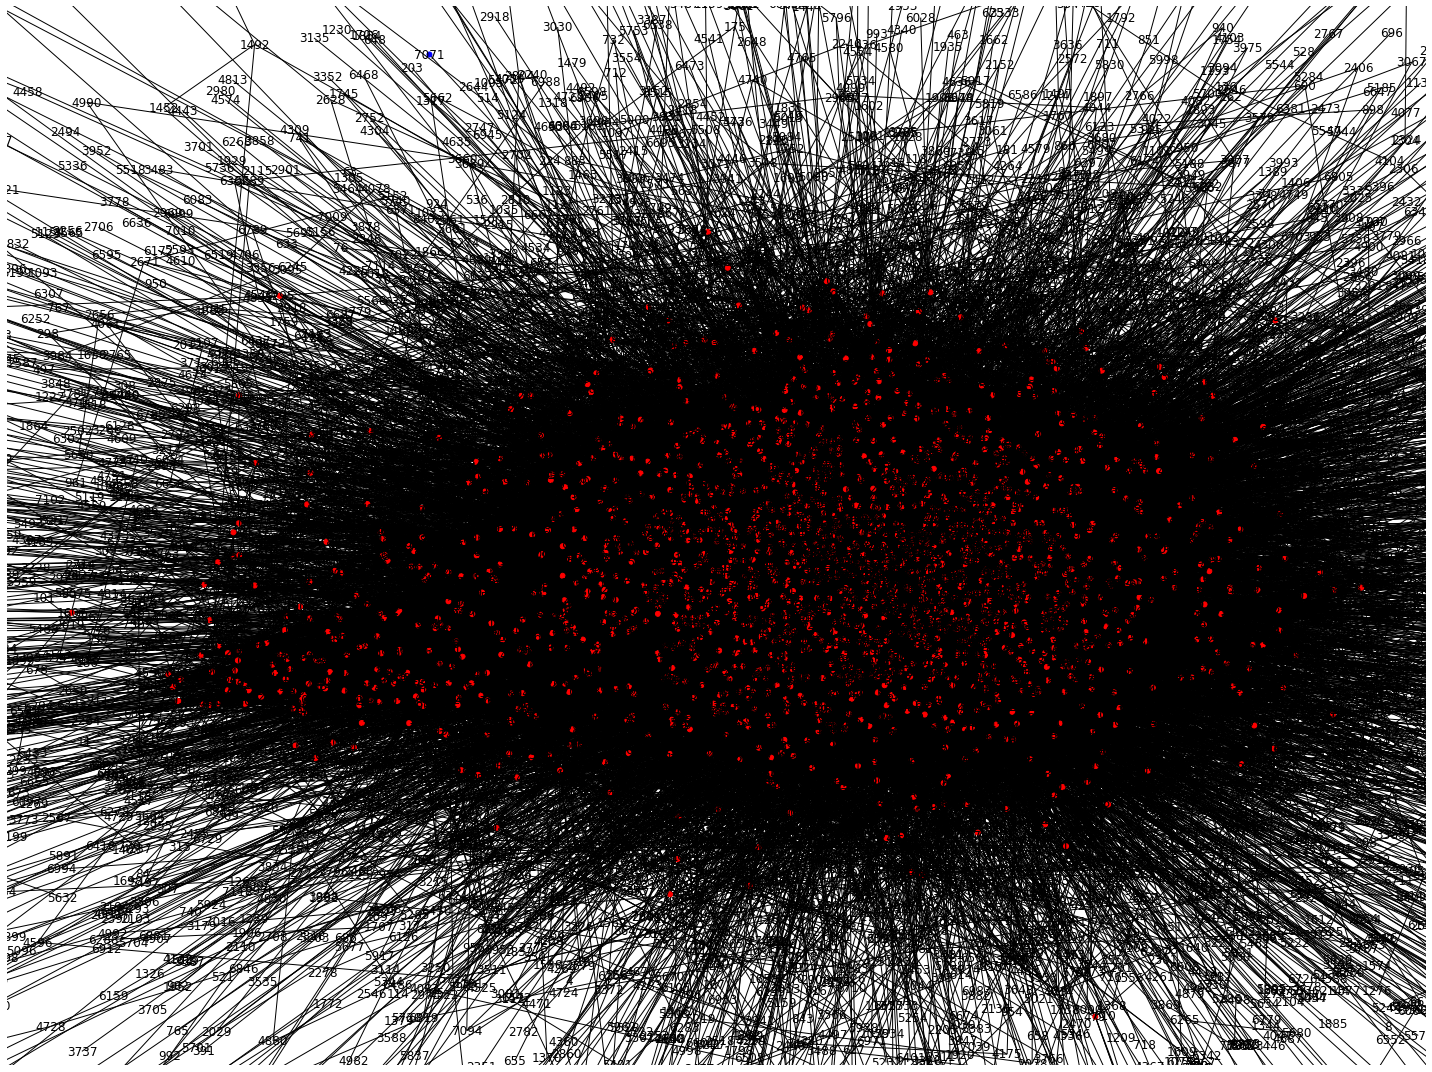

In [21]:
plt.figure(figsize=(20,15))
degree = dict(G.degree())
color_map = []
node_size = []
node_list = []
for node in G.nodes:
  if degree[node] >= 10 :
    color_map.append("red")
    node_size.append(25)
    node_list.append(node)
else:
    color_map.append("blue")
    node_size.append(25)
    node_list.append(node)
nx.draw_networkx(G,node_color=color_map,node_size=node_size,nodelist=node_list)

plt.axis("off")
plt.tight_layout()
plt.show()

In [22]:
nx.density(G)

0.0013914550620165345

Closeness centrality

In [23]:
bc = nx.closeness_centrality(G)
list(sorted(bc.items(), key = lambda x: x[1], reverse = True))

[(4949, 0.41635014316601415),
 (1773, 0.4088718007574888),
 (3401, 0.3985791004699038),
 (5842, 0.3952623987573505),
 (2447, 0.39111818630949113),
 (1924, 0.3875231154139019),
 (792, 0.3836420417833297),
 (6716, 0.37746344564526385),
 (2997, 0.37553365308596426),
 (2345, 0.3749605304704768),
 (2740, 0.3744481816270759),
 (4016, 0.3728024277940561),
 (1089, 0.37254901960784315),
 (3285, 0.3680268595041322),
 (1869, 0.36704100556356895),
 (4196, 0.36673872760963555),
 (372, 0.3667009778692743),
 (5969, 0.36647464252648904),
 (93, 0.36611684908278097),
 (2845, 0.3649354640442532),
 (2352, 0.36294636034842853),
 (1601, 0.36294636034842853),
 (2732, 0.3620610803394481),
 (6136, 0.3615283133752791),
 (779, 0.3614366154314412),
 (807, 0.3610519914867741),
 (4681, 0.3606864432519996),
 (877, 0.3599757490021725),
 (26, 0.359285966416217),
 (5138, 0.3592316224664717),
 (560, 0.3589059036872859),
 (6359, 0.35847252968404103),
 (5396, 0.3580941850530231),
 (581, 0.3579862332311712),
 (5276, 0.3578

In [24]:
cc = nx.closeness_centrality(G)
list(sorted(cc.items(), key = lambda x: x[1], reverse = True))[:5]

[(4949, 0.41635014316601415),
 (1773, 0.4088718007574888),
 (3401, 0.3985791004699038),
 (5842, 0.3952623987573505),
 (2447, 0.39111818630949113)]

Eigenvalue centrality

In [25]:
e=nx.eigenvector_centrality_numpy(G)
e
ec=sorted(e.items(),key=lambda v:(v[1],v[0]),reverse=True)
ec[:5]

[(4949, 0.2765892440233743),
 (1773, 0.23629817987599108),
 (5842, 0.15932191095572848),
 (3401, 0.1579922130915893),
 (1924, 0.14461715365798639)]

node-betweenness centrality

In [26]:
bet=nx.betweenness_centrality(G)
bet
bet_c=sorted(bet.items(),key=lambda v:v[1],reverse=True)
bet_c[:5]

[(1773, 0.12676712903733448),
 (4949, 0.11817297351037272),
 (3401, 0.0673181871336396),
 (5842, 0.04639859972716591),
 (6136, 0.0373696822989485)]

edge-betweenness centrality

In [27]:
eb=nx.edge_betweenness_centrality(G)
eb
ed=sorted(eb.items(),key=lambda v:v[1],reverse=True)
ed[:5]

[((3401, 1773), 0.00664475162547959),
 ((3401, 4949), 0.004979527846980052),
 ((5842, 1773), 0.0037329099083007996),
 ((4949, 1598), 0.002917129338939973),
 ((3401, 6136), 0.0027987612898195094)]

betweeness centrality graph 

(-1.0285429656505585, 1.096597284078598, -0.99311603307724, 1.070501458644867)

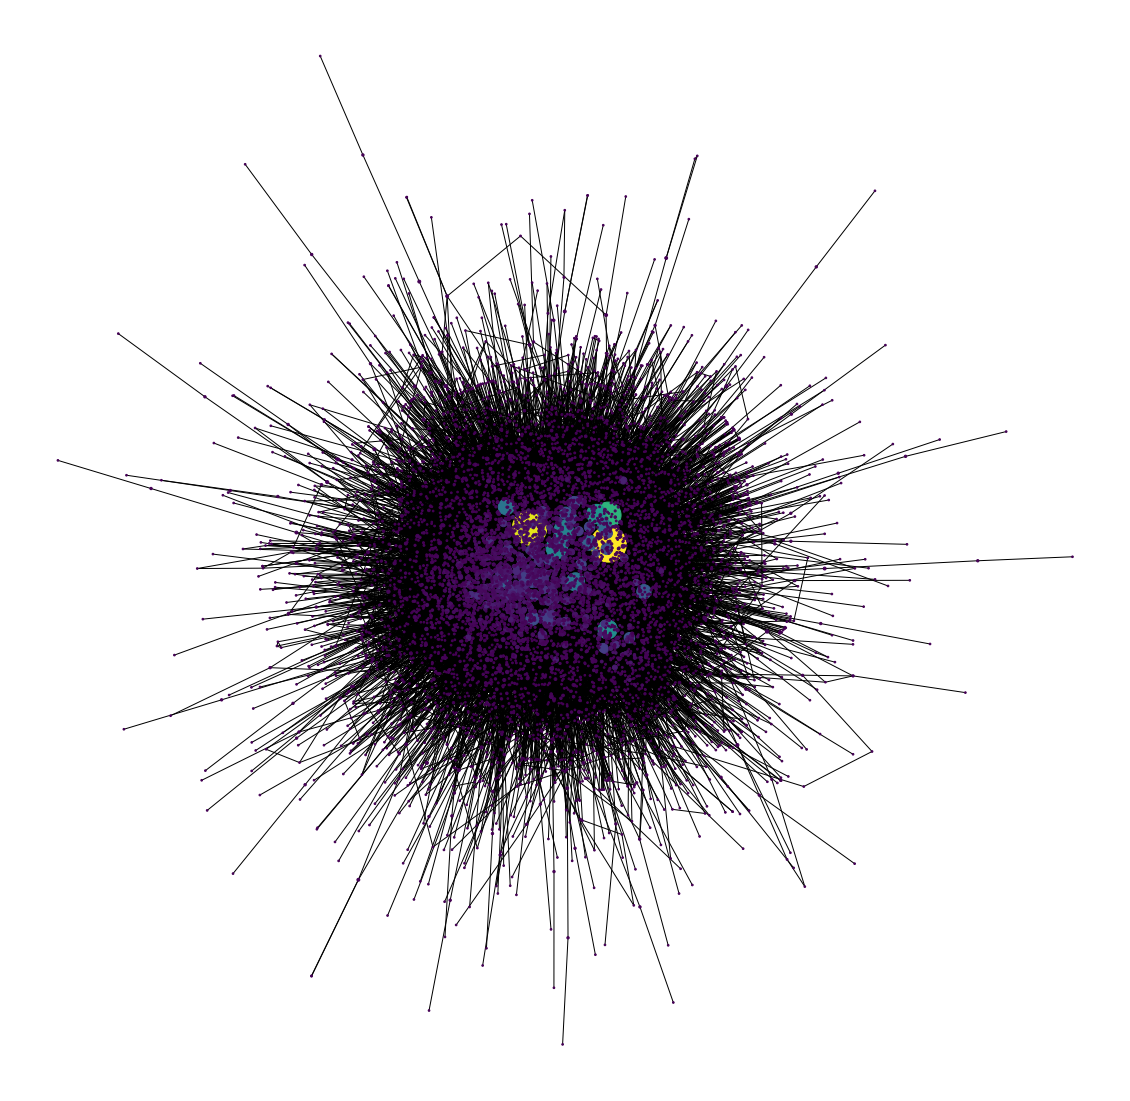

In [28]:
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

closeness centrality graph

(-0.9826491326093674,
 0.9208957999944687,
 -1.0888848215341569,
 0.8665812522172928)

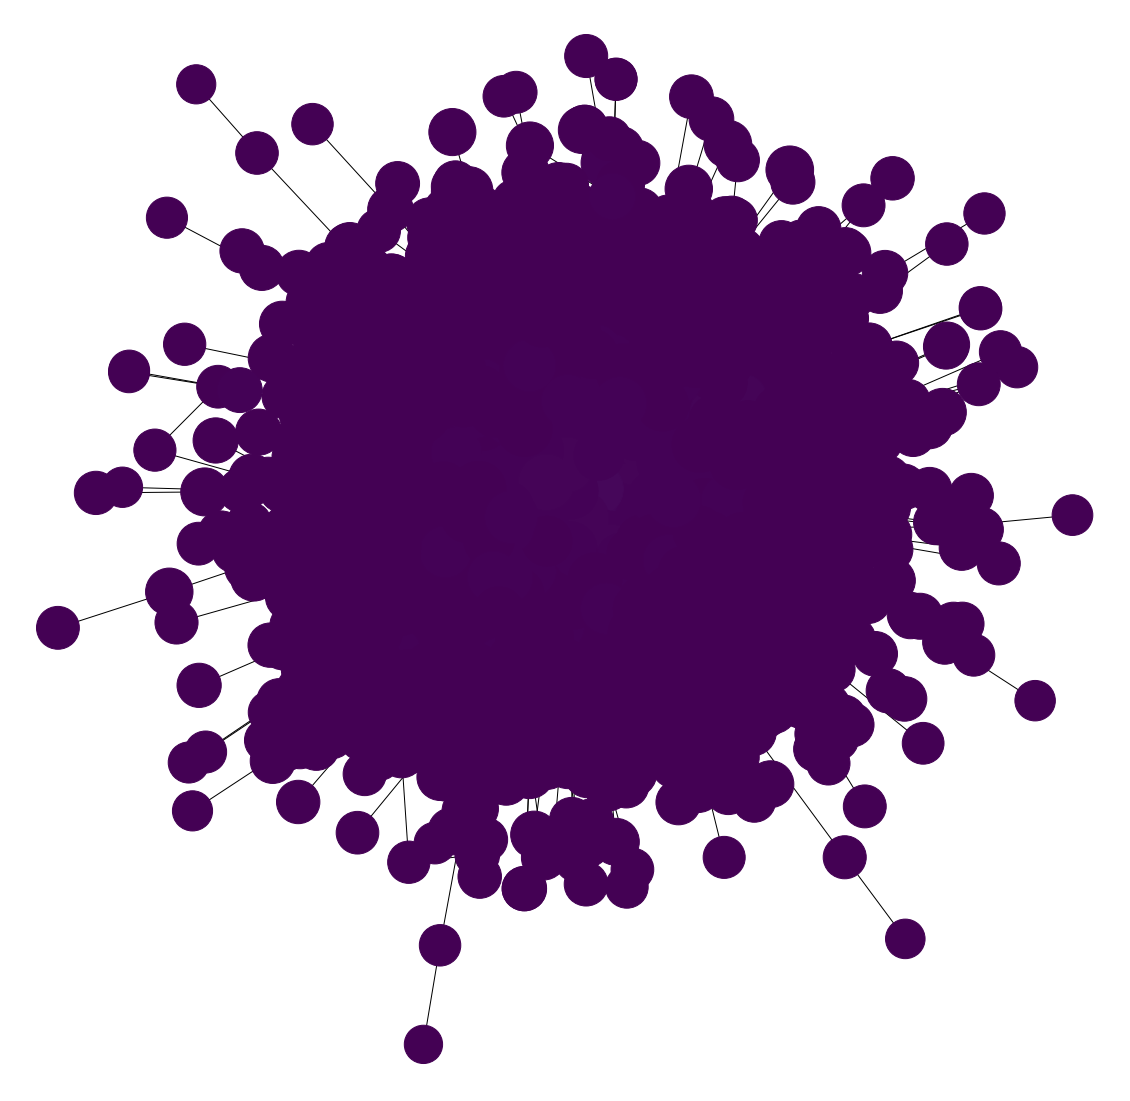

In [32]:
pos = nx.spring_layout(G)
betCent2 = nx.closeness_centrality(G)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent2.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

eigenvector centrality graph

(-0.949508574604988,
 0.8909033209085464,
 -0.9396198034286499,
 1.0923627853393554)

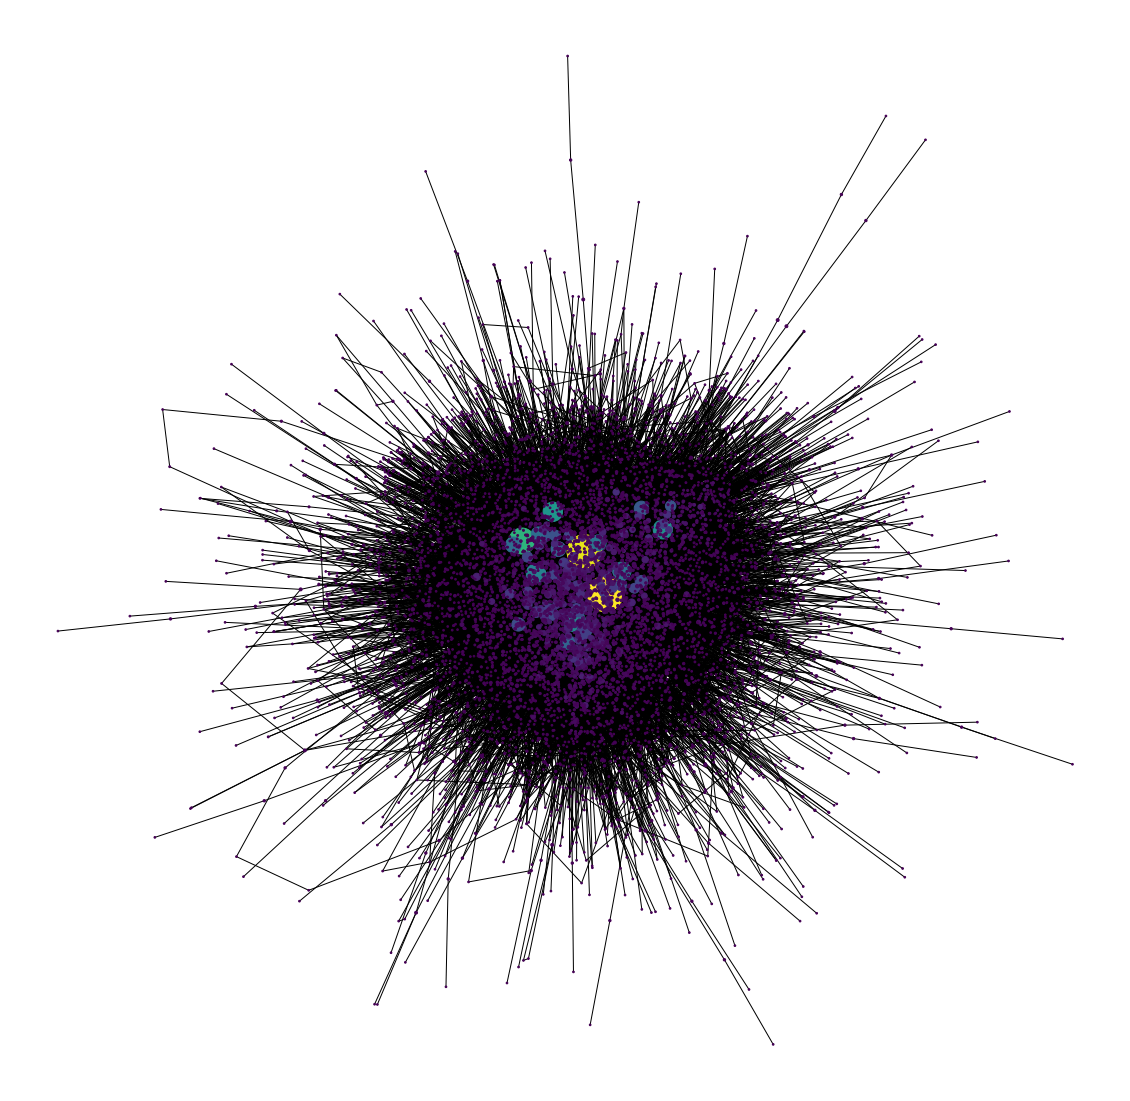

In [35]:
pos = nx.spring_layout(G)
betCent3 = nx.eigenvector_centrality_numpy(G)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')